In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector

In [3]:
''' connecting with DataBase -> MySQL '''

db = mysql.connector.connect(

    host = "localhost",
    username = "root",
    password = "your_pass",
    database = "your_db",
)

cur = db.cursor()

In [ ]:
''' 

-- 1. List all unique cities where customers are located.
-- 2. List all customer state
-- 3. Count the years.
-- 4. Count the number of orders placed in each years.
-- 5. Show the year with the highest number of orders placed.
-- 6. Show the all the year with their order status.
-- 7. Find the total sales per category.
-- 8. Calculate the percentage of orders that were paid in installments.
-- 9. Count the number of customers from each state.
-- 10. Count the payment type.

'''

#  List all unique cities where customers are located.

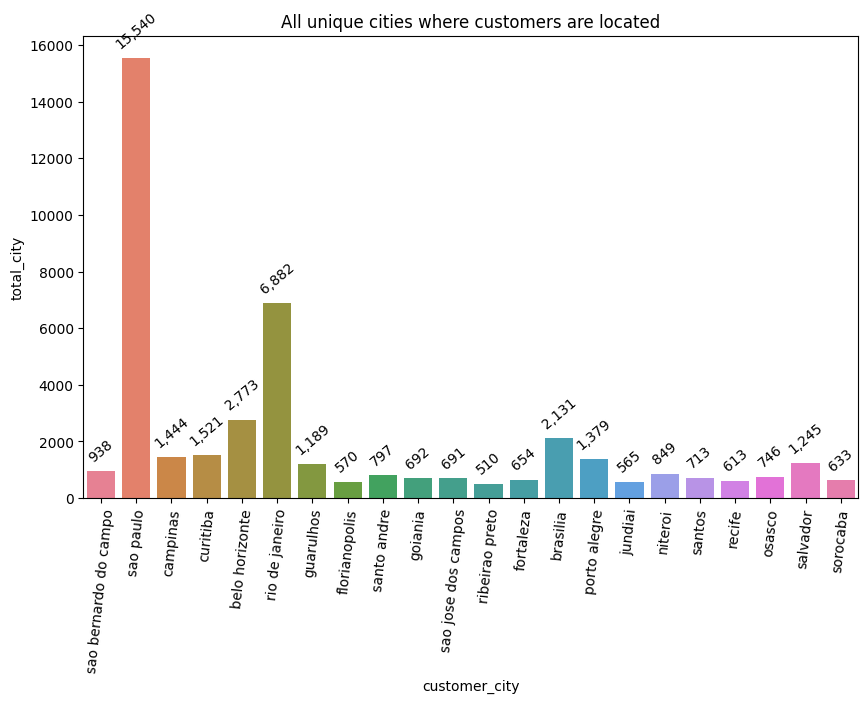

,customer_city,total_city
1,sao bernardo do campo,938
2,sao paulo,15540
4,campinas,1444
7,curitiba,1521
8,belo horizonte,2773
10,rio de janeiro,6882
14,guarulhos,1189
16,florianopolis,570
18,santo andre,797
19,goiania,692


In [128]:
plt.figure(figsize=(10, 6))

ax = sns.barplot(x='customer_city', y='total_city', data = df1, hue='customer_city')

for bars in ax.containers:

    ax.bar_label(bars, fmt='{:,.0f}', label_type='edge', rotation = 40, padding = 5)

plt.title('All unique cities where customers are located')
plt.xticks(rotation=84)
plt.show()

query = '''
SELECT 
    customer_city, COUNT(customer_city) AS 'total_city'
FROM
    customers
GROUP BY customer_city; '''

cur.execute(query)
data = cur.fetchall()

df = pd.DataFrame(data, columns=["customer_city", "total_city"])
df1 = df.loc[(df['total_city']>=500) & (df['total_city']<=15540)]
df1

# Counting payment type

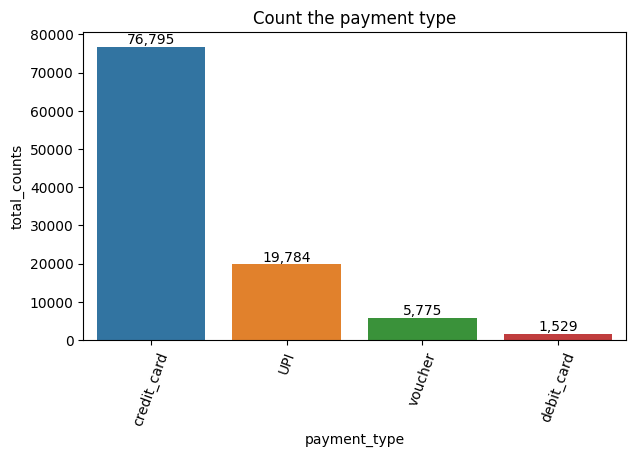

,payment_type,total_counts
0,credit_card,76795
1,UPI,19784
2,voucher,5775
3,debit_card,1529


In [21]:
plt.figure(figsize=(7, 4))

ax = sns.barplot(x='payment_type', y='total_counts', data = df, hue='payment_type')

for bars in ax.containers:

    ax.bar_label(bars, fmt='{:,.0f}', label_type='edge')

plt.title('Count the payment type')
plt.xticks(rotation=70)
plt.show()

query = '''
SELECT 
    payment_type, COUNT(payment_type) AS total_counts
FROM
    payments
WHERE payment_type IN ('credit_card', 'UPI', 'voucher', 'debit_card')
GROUP BY payment_type; '''

cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data, columns=['payment_type', 'total_counts'])
df

# Ratio of payment type

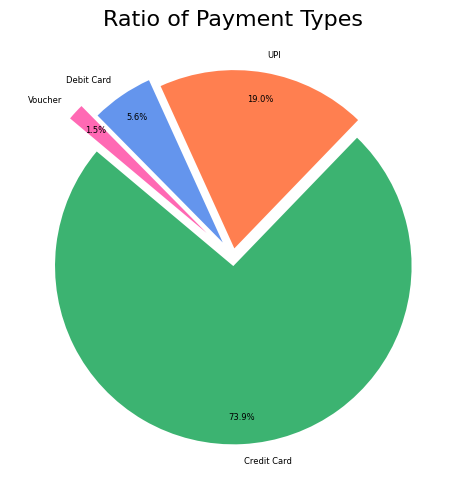

In [33]:
labels = ['Credit Card', 'UPI', 'Debit Card', 'Voucher']
sizes = [73.9, 19.0, 5.6, 1.5]
colors = ['mediumseagreen', 'coral', 'cornflowerblue', 'hotpink']
explode = [0.05, 0.05, 0.1, 0.2]  # Explode smaller slices more

plt.figure(figsize=(5, 5))
patches, texts, autotexts = plt.pie(
    sizes,
    labels=labels,
    colors=colors,
    explode=explode,
    autopct='%1.1f%%',
    startangle=140,
    pctdistance=0.85,
    labeldistance=1.1
)

for text in texts:
    text.set_fontsize(6)
for autotext in autotexts:
    autotext.set_fontsize(6)
    autotext.set_color('black')

plt.title('Ratio of Payment Types', fontsize=16)
plt.tight_layout()
plt.show()

# List all customer state

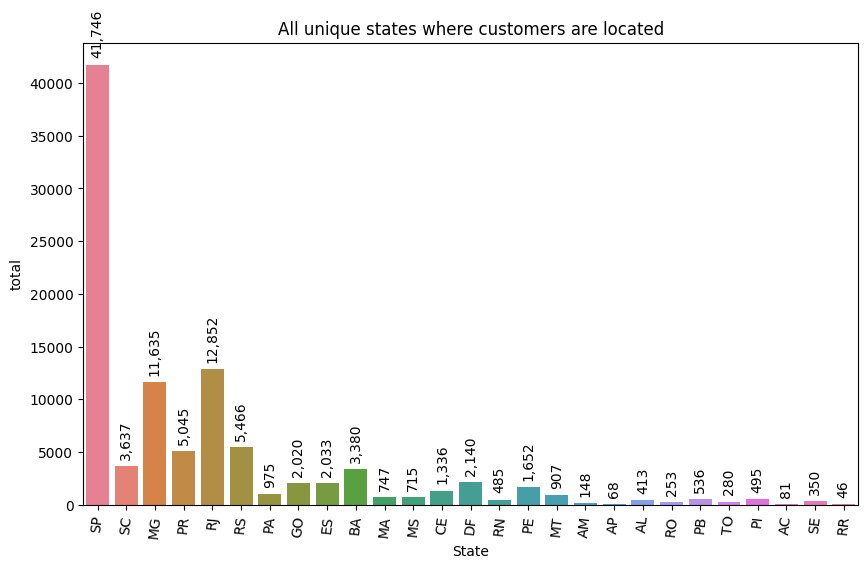

,State,total
0,SP,41746
1,SC,3637
2,MG,11635
3,PR,5045
4,RJ,12852
5,RS,5466
6,PA,975
7,GO,2020
8,ES,2033
9,BA,3380


In [126]:
plt.figure(figsize=(10, 6))

ax = sns.barplot(x='State', y='total', data = df, hue='State')

for bars in ax.containers:

    ax.bar_label(bars, fmt='{:,.0f}', label_type='edge', rotation = 90, padding = 5)

plt.title('All unique states where customers are located')
plt.xticks(rotation=84)
plt.show()

query = ''' SELECT 
    customer_state, COUNT(customer_state) AS 'Total_state'
FROM
    customers
GROUP BY customer_state; '''

cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data, columns=["State", "total"])
df

# Count the years.

In [39]:
query = ''' SELECT * FROM orders;
SELECT DISTINCT
    YEAR(order_purchase_timestamp) AS total_year
FROM
    orders;
 '''

cur.execute(query)
data = cur.fetchall()

df = pd.DataFrame(data, columns=["total_year"])
df

,total_year
0,2017
1,2018
2,2016


# Count the number of orders placed in each years.

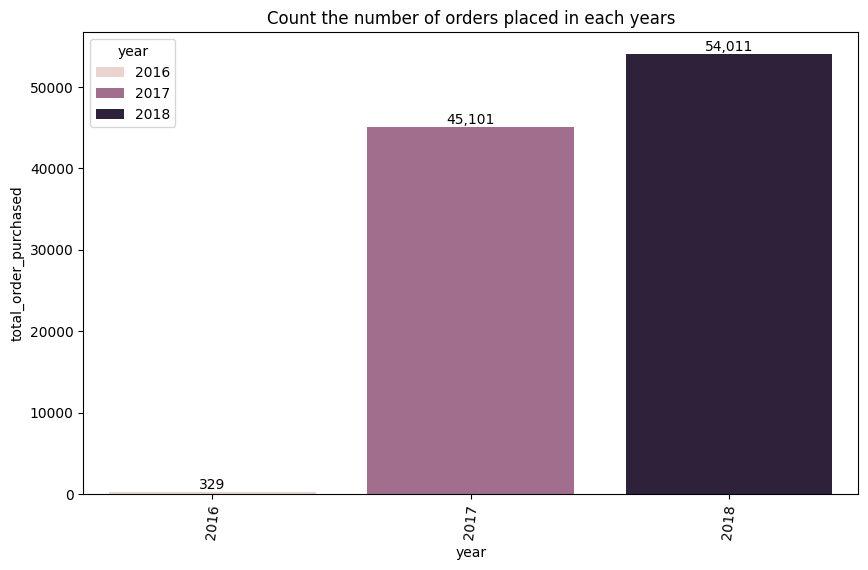

,year,total_order_purchased
0,2017,45101
1,2018,54011
2,2016,329


In [44]:
plt.figure(figsize=(10, 6))

ax = sns.barplot(x='year', y='total_order_purchased', data = df, hue='year')

for bars in ax.containers:

    ax.bar_label(bars, fmt='{:,.0f}', label_type='edge')

plt.title('Count the number of orders placed in each years')
plt.xticks(rotation=84)
plt.show()

query = ''' SELECT 
    YEAR(order_purchase_timestamp) AS 'YEAR',
    COUNT(order_id) AS 'total_order_purchased'
FROM
    orders
GROUP BY YEAR(order_purchase_timestamp);
 '''

cur.execute(query)
data = cur.fetchall()

df = pd.DataFrame(data, columns=["year", "total_order_purchased"])
df

# Show the year with the highest number of orders placed.

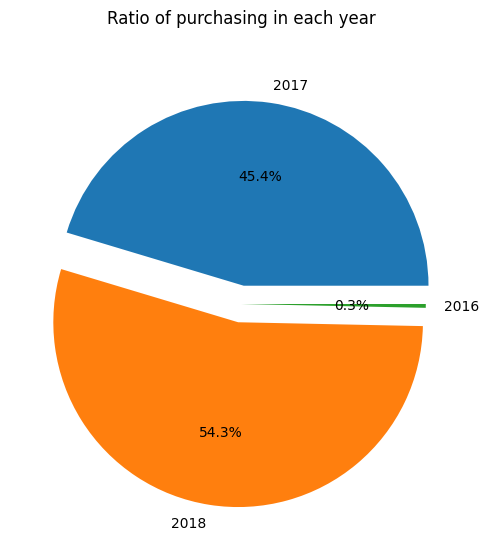

,year,highest_order_purchased
0,2017,45101
1,2018,54011
2,2016,329


In [37]:
plt.figure(figsize=(7, 6))
ex = [0.1, 0.1, 0]
label = ['2017', '2018', '2016']
plt.pie(df['highest_order_purchased'], autopct='%1.1f%%', explode=ex, labels=label)
plt.title('Ratio of purchasing in each year\n\n')
plt.show()

query = ''' SELECT 
    YEAR(order_purchase_timestamp) AS 'YEAR',
    COUNT(order_id) AS 'highest_order_purchased'
FROM
    orders
GROUP BY YEAR(order_purchase_timestamp)
ORDER BY 'highest_order_purchased' DESC; '''

cur.execute(query)
data = cur.fetchall()

df = pd.DataFrame(data, columns=["year", "highest_order_purchased"])
df

# Show all the years with their order status.

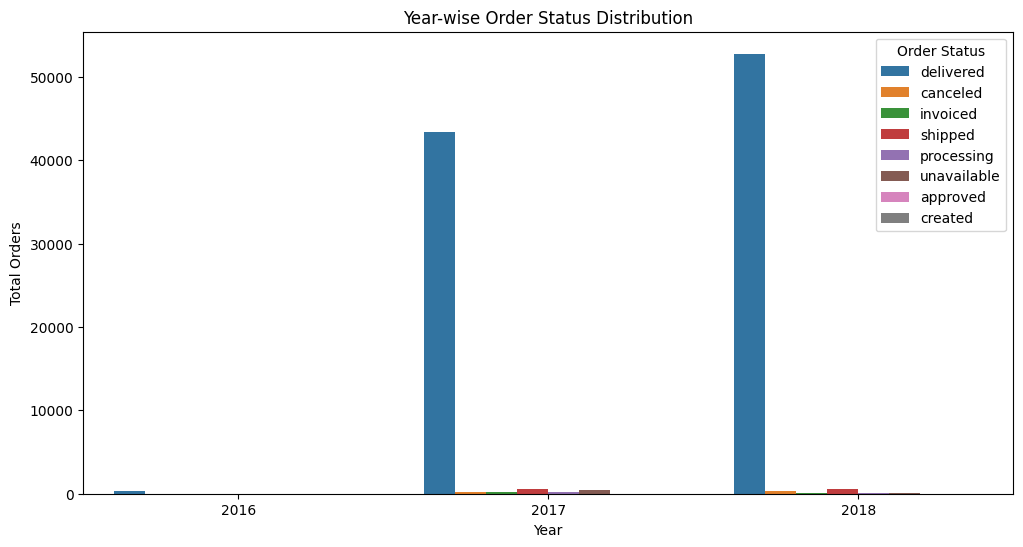

,total_year,delivered,canceled,invoiced,shipped,processing,unavailable,approved,created
0,2017,43428,265,175,530,240,457,2,4
1,2018,52783,334,121,568,59,145,0,1
2,2016,267,26,18,9,2,7,0,0


In [53]:
plt.figure(figsize=(12, 6))


df_melted = df.melt(id_vars='total_year',
                    value_vars=['delivered', 'canceled', 'invoiced', 'shipped', 
                                'processing', 'unavailable', 'approved', 'created'],
                    var_name='Order_Status',
                    value_name='Count')


ax = sns.barplot(x='total_year', y='Count', hue='Order_Status', data=df_melted)

plt.title('Year-wise Order Status Distribution')
plt.xlabel('Year')
plt.ylabel('Total Orders')
plt.legend(title='Order Status', loc='best')
plt.show()

query = ''' SELECT 
    YEAR(order_purchase_timestamp) AS 'total_year',
    SUM(CASE
        WHEN order_status = 'delivered' THEN 1
        ELSE 0
    END) AS 'Total_Delivered',
    SUM(CASE
        WHEN order_status = 'canceled' THEN 1
        ELSE 0
    END) AS 'Total_canceled',
    SUM(CASE
        WHEN order_status = 'invoiced' THEN 1
        ELSE 0
    END) AS 'Total_invoiced',
    SUM(CASE
        WHEN order_status = 'shipped' THEN 1
        ELSE 0
    END) AS 'Total_shipped',
    SUM(CASE
        WHEN order_status = 'processing' THEN 1
        ELSE 0
    END) AS 'Total_processed',
    SUM(CASE
        WHEN order_status = 'unavailable' THEN 1
        ELSE 0
    END) AS 'Total_unavailable',
    SUM(CASE
        WHEN order_status = 'approved' THEN 1
        ELSE 0
    END) AS 'Total_approved',
    SUM(CASE
        WHEN order_status = 'created' THEN 1
        ELSE 0
    END) AS 'Total_created'
FROM
    orders
GROUP BY YEAR(order_purchase_timestamp);'''

cur.execute(query)
data = cur.fetchall()

df = pd.DataFrame(data, columns=['total_year' ,'delivered', 'canceled', 'invoiced', 'shipped', 'processing', 'unavailable', 'approved', 'created'])
df

# Find the total sales per category.

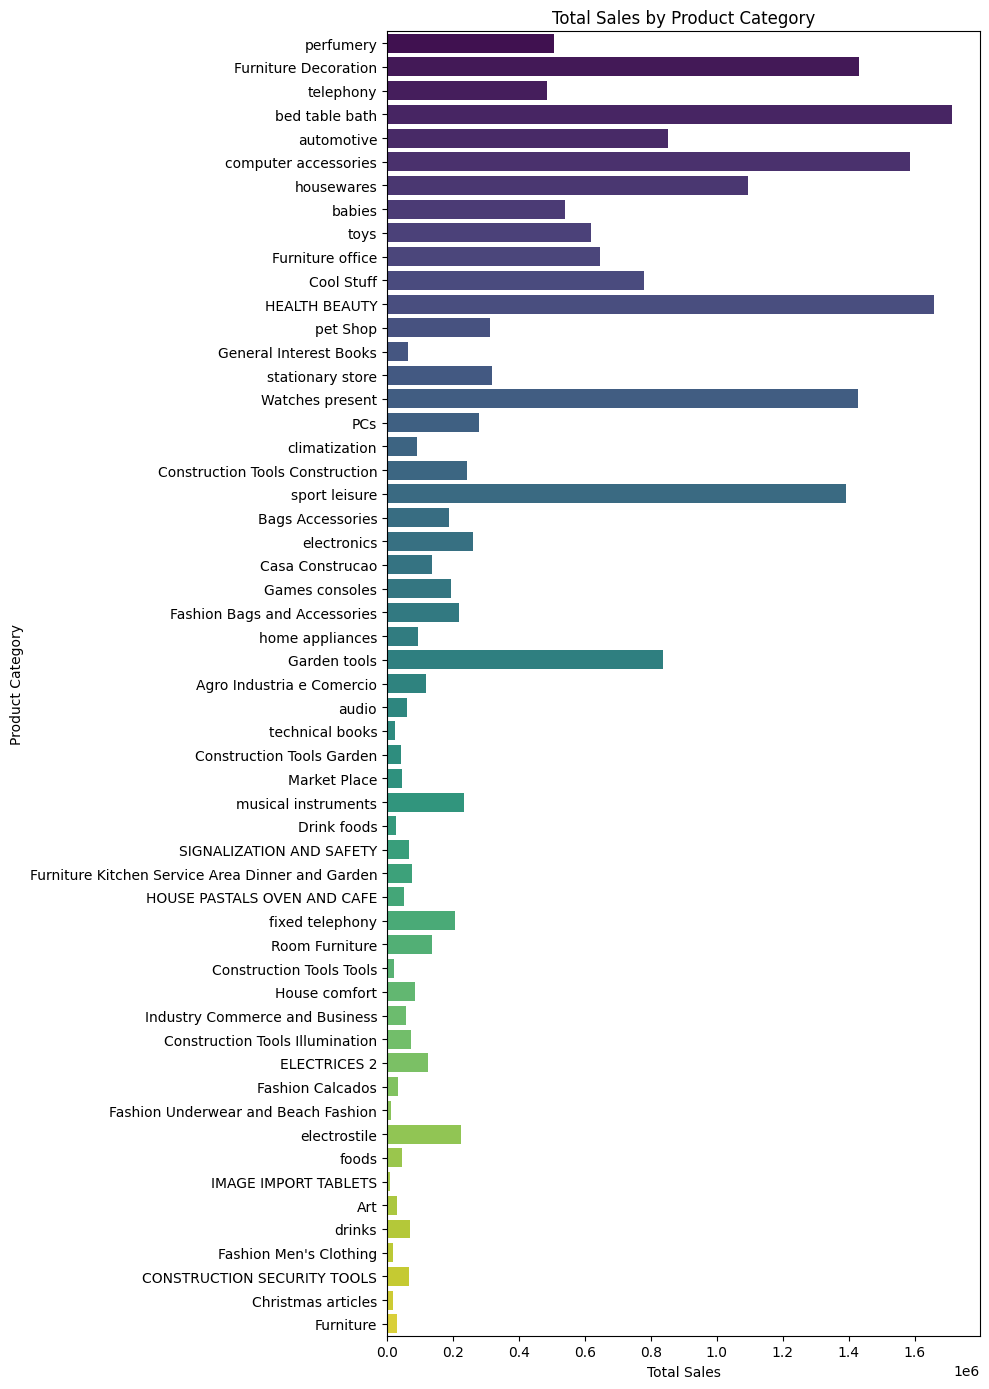

,product_category,total_sales
0,perfumery,506738.66
1,Furniture Decoration,1430176.39
2,telephony,486882.05
3,bed table bath,1712553.67
4,automotive,852294.33
5,computer accessories,1585330.45
6,housewares,1094758.13
7,babies,539845.66
8,toys,619037.69
9,Furniture office,646826.49


In [18]:
plt.figure(figsize=(10, 14))

ax = sns.barplot(
    y='product_category',
    x='total_sales',
    data=df1,
    hue='product_category',    
    palette='viridis',
    legend=False              
)

plt.title('Total Sales by Product Category')
plt.xlabel('Total Sales')
plt.ylabel('Product Category')
plt.tight_layout()
plt.show()

query = ''' SELECT 
    p1.product_category, 
    ROUND(SUM(p2.payment_value), 2) AS 'total_sales'
FROM
    products p1
        JOIN
    order_items o ON p1.product_id = o.product_id
        JOIN
    payments p2 ON o.order_id = p2.order_id
WHERE
    p1.product_category IS NOT NULL
GROUP BY p1.product_category; '''

cur.execute(query)
data = cur.fetchall()

df = pd.DataFrame(data, columns=["product_category", "total_sales"])
df1 = df.loc[(df['total_sales']>=10000) & (df['total_sales']<=1712553.67)]
df1

# Calculate the percentage of orders that were paid in installments.

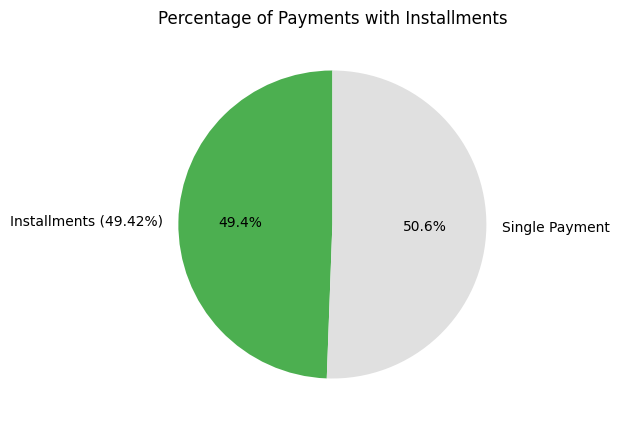

,percentage_installments
0,49.42


In [66]:
val = df['percentage_installments'][0]
plt.figure(figsize=(5,5))

plt.pie(
    [val, 100 - val],
    labels=[f'Installments ({val}%)', 'Single Payment'],
    colors=['#4CAF50', '#E0E0E0'],
    autopct='%1.1f%%',
    startangle=90
)
plt.title('Percentage of Payments with Installments')
plt.show()


query = '''

SELECT 
    ROUND(
        (SUM(CASE WHEN payment_installments > 1 THEN 1 ELSE 0 END) 
         / COUNT(*)) * 100, 2
    ) AS percentage_installments
FROM payments;

'''

cur.execute(query)
data = cur.fetchall()

df = pd.DataFrame(data, columns=["percentage_installments"])
df

# -- Calculate the number of orders per month in 2018.

In [ ]:
''' 
1. Calculate the number of orders per month in 2018, 2016, 2017.
2. Find the average number of products per order, grouped by customer city.
3. Calculate the percentage of total revenue contributed by each product category.
4. Identify the  number of times a product has been purchased.
5. Calculate the total revenue generated by each seller, and rank them by revenue.

'''

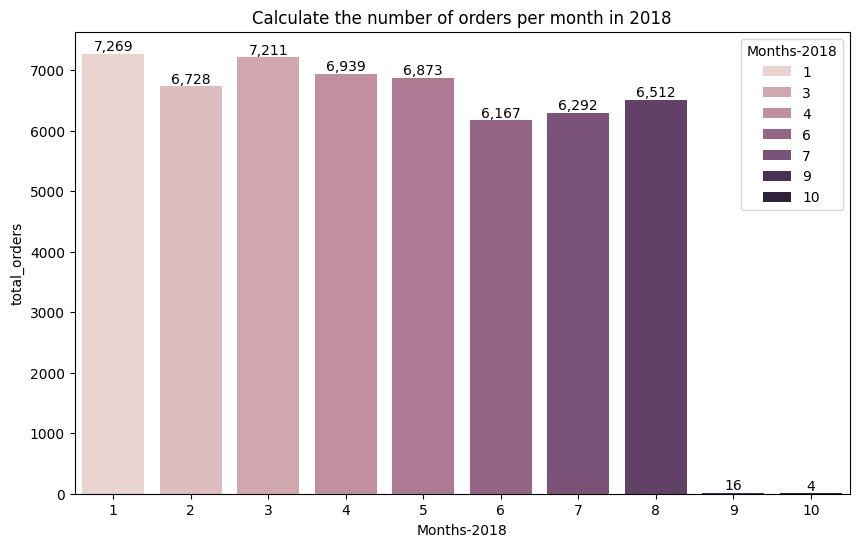

,Months-2018,total_orders
0,1,7269
1,2,6728
2,3,7211
3,4,6939
4,5,6873
5,6,6167
6,7,6292
7,8,6512
8,9,16
9,10,4


In [75]:
plt.figure(figsize=(10, 6))

ax = sns.barplot(x='Months-2018', y='total_orders', data = df, hue='Months-2018')

for bars in ax.containers:

    ax.bar_label(bars, fmt='{:,.0f}', label_type='edge')

plt.title('Calculate the number of orders per month in 2018')
plt.show()

query = ''' 
SELECT 
    MONTH(order_purchase_timestamp) AS '2018 (MONTHS)',
    COUNT(order_id) AS 'Total_order'
FROM
    orders
WHERE YEAR(order_purchase_timestamp) = '2018'
GROUP BY MONTH(order_purchase_timestamp)
ORDER BY MONTH(order_purchase_timestamp) ASC;

'''

cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data, columns=["Months-2018", "total_orders"])
df

# -- Calculate the number of orders per month in 2017.

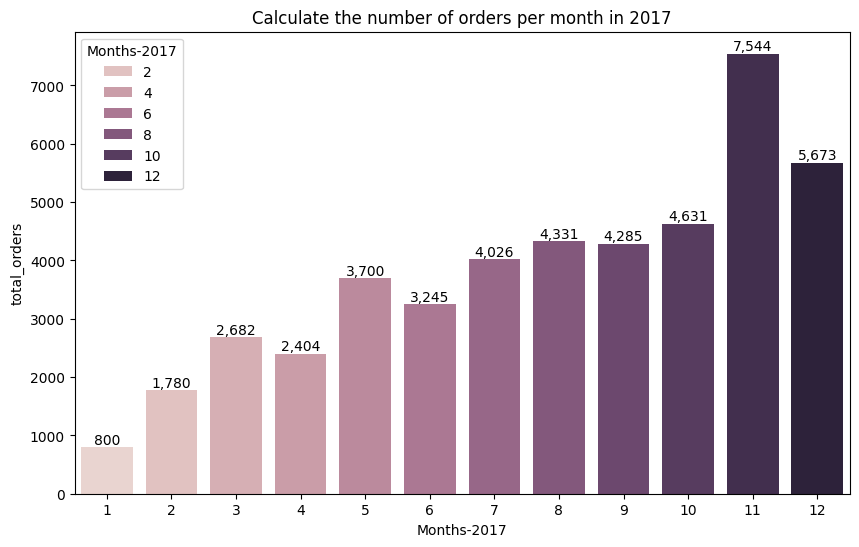

,Months-2017,total_orders
0,1,800
1,2,1780
2,3,2682
3,4,2404
4,5,3700
5,6,3245
6,7,4026
7,8,4331
8,9,4285
9,10,4631


In [77]:
plt.figure(figsize=(10, 6))

ax = sns.barplot(x='Months-2017', y='total_orders', data = df, hue='Months-2017')

for bars in ax.containers:

    ax.bar_label(bars, fmt='{:,.0f}', label_type='edge')

plt.title('Calculate the number of orders per month in 2017')
plt.show()

query = ''' 
SELECT 
    MONTH(order_purchase_timestamp) AS 'Months-2017',
    COUNT(order_id) AS 'Total_order'
FROM
    orders
WHERE YEAR(order_purchase_timestamp) = '2017'
GROUP BY MONTH(order_purchase_timestamp)
ORDER BY MONTH(order_purchase_timestamp) ASC;
'''

cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data, columns=["Months-2017", "total_orders"])
df

# Calculate the number of orders per month in 2016.

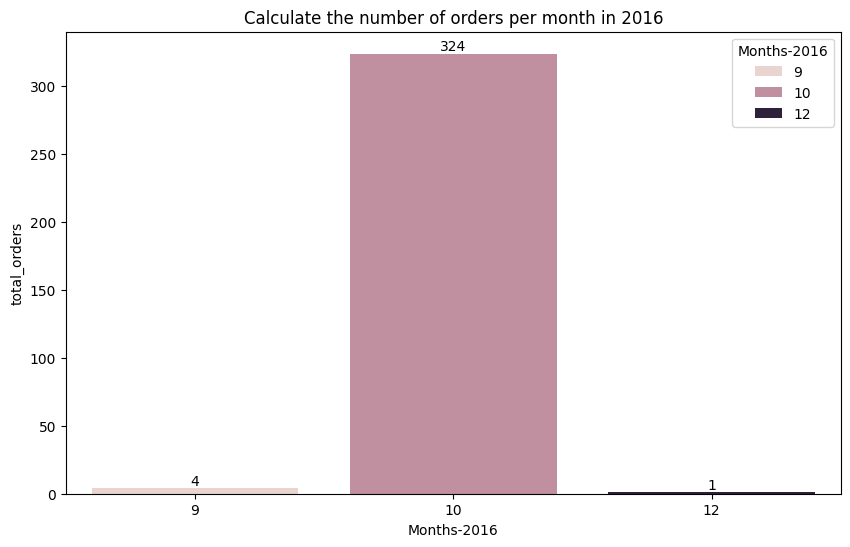

,Months-2016,total_orders
0,9,4
1,10,324
2,12,1


In [84]:
plt.figure(figsize=(10, 6))

ax = sns.barplot(x='Months-2016', y='total_orders', data = df, hue='Months-2016')

for bars in ax.containers:

    ax.bar_label(bars, fmt='{:,.0f}', label_type='edge')

plt.title('Calculate the number of orders per month in 2016')
plt.show()

query = ''' 
SELECT 
    MONTH(order_purchase_timestamp) AS 'Months-2016',
    COUNT(order_id) AS 'Total_order'
FROM
    orders
WHERE YEAR(order_purchase_timestamp) = '2016'
GROUP BY MONTH(order_purchase_timestamp)
ORDER BY MONTH(order_purchase_timestamp) ASC;
'''

cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data, columns=["Months-2016", "total_orders"])
df

# Find the average number of products per order, grouped by customer city.

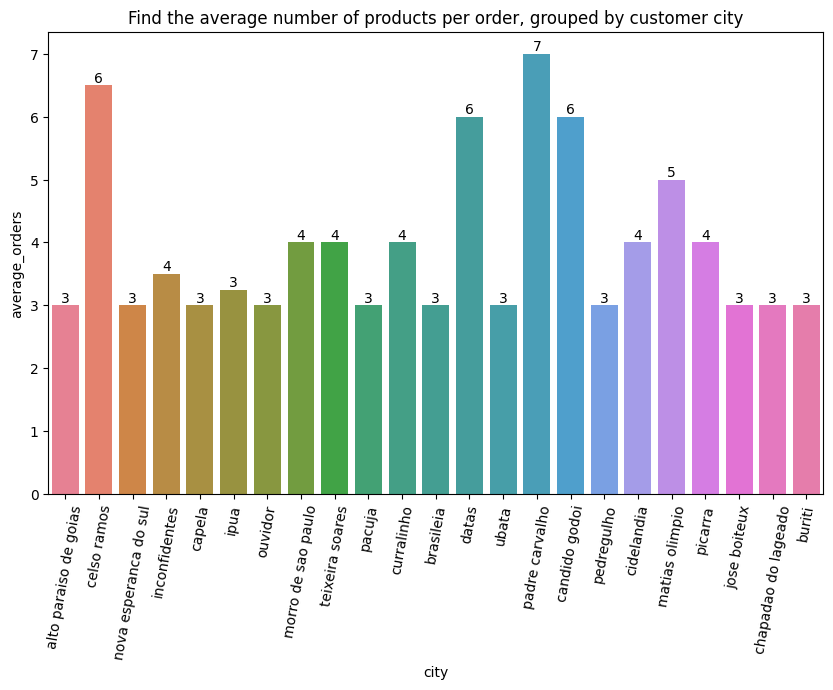

,city,average_orders
713,alto paraiso de goias,3.00
1255,celso ramos,6.50
1660,nova esperanca do sul,3.00
1977,inconfidentes,3.50
2454,capela,3.00
2486,ipua,3.25
2595,ouvidor,3.00
2717,morro de sao paulo,4.00
2912,teixeira soares,4.00
3033,pacuja,3.00


In [96]:
plt.figure(figsize=(10, 6))

ax = sns.barplot(x='city', y='average_orders', data = df1, hue='city')

for bars in ax.containers:

    ax.bar_label(bars, fmt='{:,.0f}', label_type='edge')

plt.title('Find the average number of products per order, grouped by customer city')
plt.xticks(rotation=80)
plt.show()

query = ''' 

with count_per_order as
(select orders.order_id, orders.customer_id, count(order_items.order_id) as oc
from orders join order_items
on orders.order_id = order_items.order_id
group by orders.order_id, orders.customer_id)
select customers.customer_city, round(avg(count_per_order.oc), 2) average_orders
from customers join count_per_order
on customers.customer_id = count_per_order.customer_id
group by customers.customer_city
;
'''
cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data, columns=['city', 'average_orders'])
df1 = df.loc[(df['average_orders']>=3.0) & (df['average_orders']<=7.0)]
df1

# Calculate the percentage of total revenue contributed by each product category.

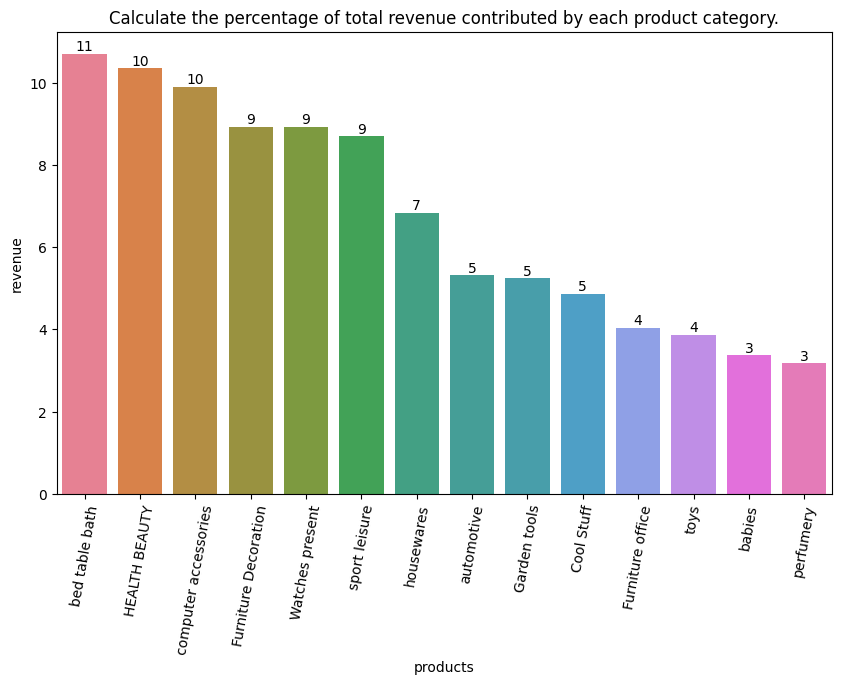

,products,revenue
0,bed table bath,10.70
1,HEALTH BEAUTY,10.35
2,computer accessories,9.90
3,Furniture Decoration,8.93
4,Watches present,8.93
5,sport leisure,8.70
6,housewares,6.84
7,automotive,5.32
8,Garden tools,5.24
9,Cool Stuff,4.87


In [102]:
plt.figure(figsize=(10, 6))

ax = sns.barplot(x='products', y='revenue', data = df1, hue='products')

for bars in ax.containers:

    ax.bar_label(bars, fmt='{:,.0f}', label_type='edge')

plt.title('Calculate the percentage of total revenue contributed by each product category.')
plt.xticks(rotation=80)
plt.show()

query = ''' SELECT 
    p1.product_category,
    ROUND(SUM(p2.payment_value) * 100.0 / (SELECT 
                    SUM(payment_value)
                FROM
                    payments),
            2) AS 'revenue'
FROM
    products p1
        JOIN
    order_items o ON p1.product_id = o.product_id
        JOIN
    payments p2 ON p2.order_id = o.order_id
GROUP BY p1.product_category
ORDER BY revenue DESC
; '''

cur.execute(query)
data = cur.fetchall()

df = pd.DataFrame(data, columns=["products", "revenue"])
df1 = df.head(14)
df1

# Identify the number of times a product has been purchased.

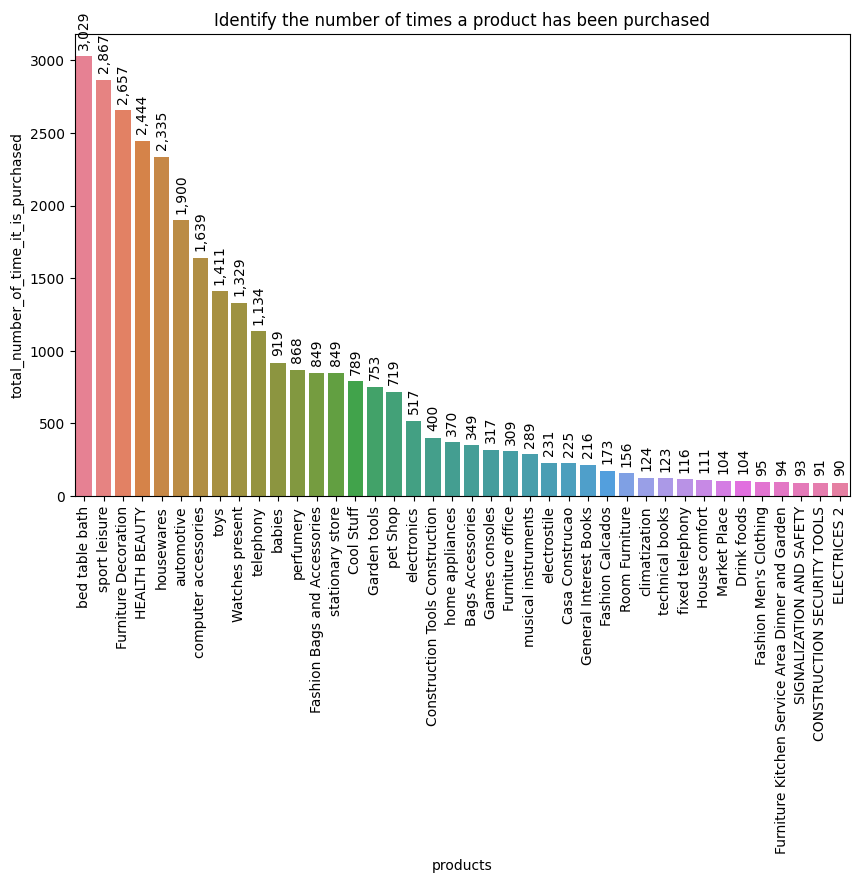

,products,total_number_of_time_it_is_purchased
0,bed table bath,3029
1,sport leisure,2867
2,Furniture Decoration,2657
3,HEALTH BEAUTY,2444
4,housewares,2335
5,automotive,1900
6,computer accessories,1639
7,toys,1411
8,Watches present,1329
9,telephony,1134


In [112]:
plt.figure(figsize=(10, 6))

ax = sns.barplot(x='products', y='total_number_of_time_it_is_purchased', data = df1, hue='products')

for bars in ax.containers:

    ax.bar_label(bars, fmt='{:,.0f}', label_type='edge', rotation=90, padding = 5)

plt.title('Identify the number of times a product has been purchased')
plt.xticks(rotation=90)
plt.show()

query = ''' 
SELECT product_category,
COUNT(product_category) AS 'total_number_of_time_it_is_purchased'
FROM products
GROUP BY product_category
ORDER BY total_number_of_time_it_is_purchased DESC
;
'''

cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data, columns=['products', 'total_number_of_time_it_is_purchased'])
df1 = df.head(40)
df1

# Calculate the total revenue percentage generated by each seller

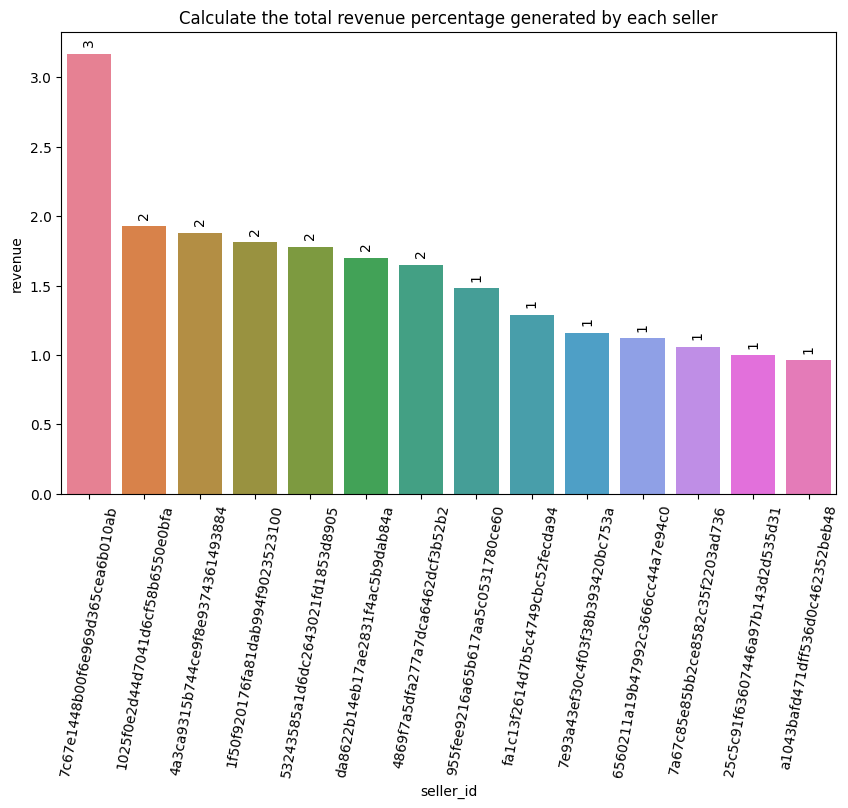

,seller_id,revenue
0,7c67e1448b00f6e969d365cea6b010ab,3.17
1,1025f0e2d44d7041d6cf58b6550e0bfa,1.93
2,4a3ca9315b744ce9f8e9374361493884,1.88
3,1f50f920176fa81dab994f9023523100,1.81
4,53243585a1d6dc2643021fd1853d8905,1.78
5,da8622b14eb17ae2831f4ac5b9dab84a,1.70
6,4869f7a5dfa277a7dca6462dcf3b52b2,1.65
7,955fee9216a65b617aa5c0531780ce60,1.48
8,fa1c13f2614d7b5c4749cbc52fecda94,1.29
9,7e93a43ef30c4f03f38b393420bc753a,1.16


In [117]:
plt.figure(figsize=(10, 6))

ax = sns.barplot(x='seller_id', y='revenue', data = df1, hue='seller_id')

for bars in ax.containers:

    ax.bar_label(bars, fmt='{:,.0f}', label_type='edge', rotation=90, padding = 5)

plt.title('Calculate the total revenue percentage generated by each seller')
plt.xticks(rotation=80)
plt.show()

query = ''' SELECT 
    s.seller_id,
    ROUND(SUM(p2.payment_value) * 100.0 / (SELECT 
                    SUM(payment_value)
                FROM
                    payments),
            2) AS 'revenue'
FROM
    sellers s
        JOIN
    order_items o ON s.seller_id = o.seller_id
        JOIN
    payments p2 ON p2.order_id = o.order_id
GROUP BY s.seller_id
ORDER BY revenue DESC
;'''

cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data, columns=['seller_id', 'revenue'])
df1 = df.head(14)
df1

In [ ]:
''' 
-- 1. Calculate the moving average of order values for each customer over their order history.
-- 2. Calculate the cumulative sales per month for each year.
-- 3. Identify the top 3 customers who spent the most money in each year.
'''

# Calculate the moving average of order values for each customer over their order history.

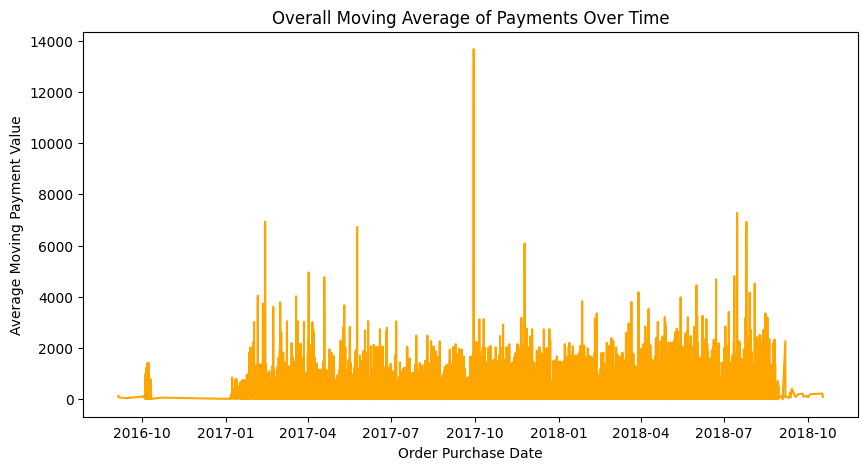

,customer_id,order_purchase_timestamp,moving_average
0,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.739998
1,000161a058600d5901f007fab4c27140,2017-07-16 09:40:32,67.410004
2,0001fd6190edaaf884bcaf3d49edf079,2017-02-28 11:06:43,195.419998
3,0002414f95344307404f0ace7a26f1d5,2017-08-16 13:09:20,179.350006
4,000379cdec625522490c315e70c7a9fb,2018-04-02 13:42:17,107.010002
...,...,...,...
103881,fffecc9f79fd8c764f843e9951b11341,2018-03-29 16:59:26,27.120001
103882,fffeda5b6d849fbd39689bb92087f431,2018-05-22 13:36:02,63.130001
103883,ffff42319e9b2d713724ae527742af25,2018-06-13 16:57:05,214.130005
103884,ffffa3172527f765de70084a7e53aae8,2017-09-02 11:53:32,45.500000


In [119]:
df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'])
df_grouped = df.groupby('order_purchase_timestamp')['moving_average'].mean().reset_index()

plt.figure(figsize=(10,5))
sns.lineplot(x='order_purchase_timestamp', y='moving_average', data=df_grouped, color='orange')

plt.title('Overall Moving Average of Payments Over Time')
plt.xlabel('Order Purchase Date')
plt.ylabel('Average Moving Payment Value')
plt.show()

query = ''' 
SELECT c.customer_id, o.order_purchase_timestamp,
AVG(p.payment_value) OVER(PARTITION BY c.customer_id ORDER BY o.order_purchase_timestamp ROWS BETWEEN UNBOUNDED PRECEDING AND CURRENT ROW) AS 'moving_average'
FROM orders o
JOIN payments p
ON o.order_id = p.order_id
JOIN customers c
ON c.customer_id = o.customer_id; 
'''

cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data, columns=["customer_id", "order_purchase_timestamp", "moving_average"])
df

# Calculate the cumulative sales per month for each year.

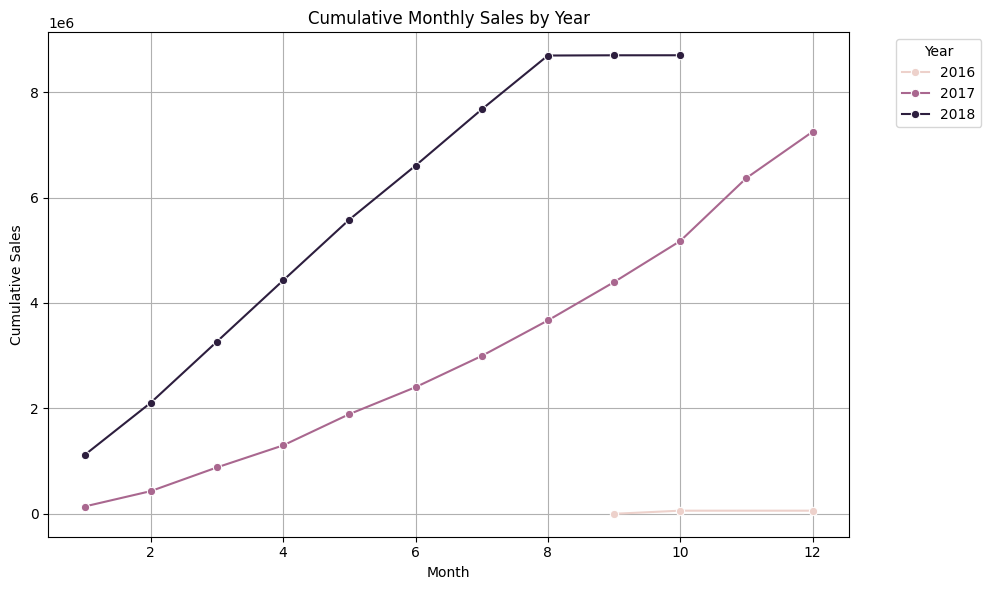

,year,Month,monthly_sales,cumulative_sum
0,2016,9,2.522400e+02,2.522400e+02
1,2016,10,5.909048e+04,5.934272e+04
2,2016,12,1.962000e+01,5.936234e+04
3,2017,1,1.384880e+05,1.384880e+05
4,2017,2,2.919080e+05,4.303960e+05
5,2017,3,4.498636e+05,8.802596e+05
6,2017,4,4.177880e+05,1.298048e+06
7,2017,5,5.929188e+05,1.890966e+06
8,2017,6,5.112764e+05,2.402243e+06
9,2017,7,5.923829e+05,2.994626e+06


In [122]:
plt.figure(figsize=(10,6))

sns.lineplot(x='Month', y='cumulative_sum', hue='year', data=df, marker='o')

plt.title('Cumulative Monthly Sales by Year')
plt.grid(True)
plt.xlabel('Month')
plt.ylabel('Cumulative Sales')
plt.legend(title='Year', bbox_to_anchor=(1.05,1), loc='upper left')
plt.tight_layout()
plt.show()


query = '''
SELECT 
  YEAR(order_purchase_timestamp) AS year,
  MONTH(order_purchase_timestamp) AS month,
  SUM(payment_value) AS monthly_sales,
  SUM(SUM(payment_value)) OVER (
    PARTITION BY YEAR(order_purchase_timestamp)
    ORDER BY MONTH(order_purchase_timestamp)
    ROWS BETWEEN UNBOUNDED PRECEDING AND CURRENT ROW
  ) AS cumulative_sales
FROM orders o
JOIN payments p
ON o.order_id = p.order_id
GROUP BY 
  YEAR(order_purchase_timestamp), 
  MONTH(order_purchase_timestamp)
ORDER BY 
  YEAR(order_purchase_timestamp), 
  MONTH(order_purchase_timestamp);
'''

cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data, columns = ['year', 'Month', 'monthly_sales', 'cumulative_sum'])
df

#  Identify the top 3 customers who spent the most money in each year.

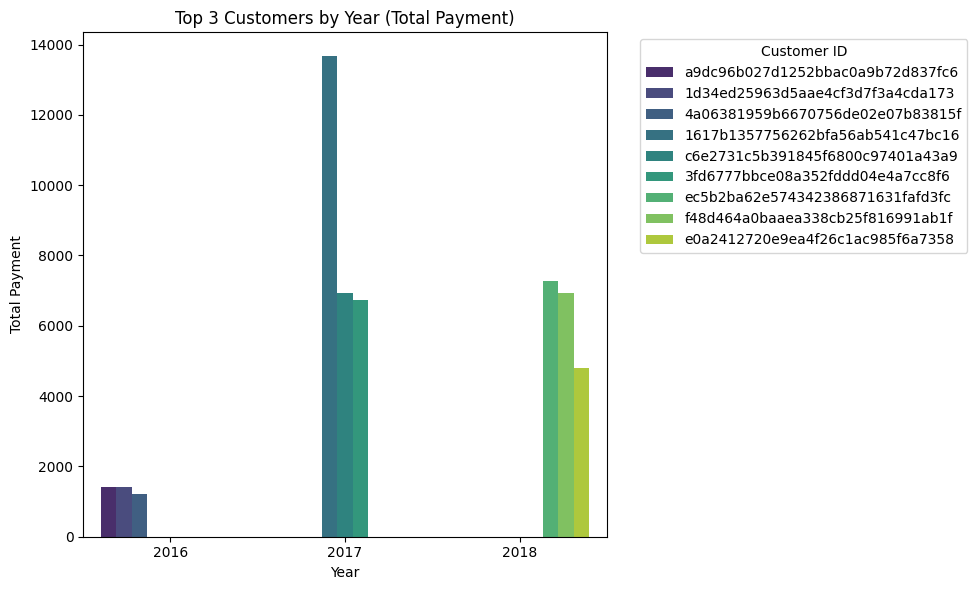

,customers,year,total_paid,ranking
0,a9dc96b027d1252bbac0a9b72d837fc6,2016,1423.550049,1
1,1d34ed25963d5aae4cf3d7f3a4cda173,2016,1400.739990,2
2,4a06381959b6670756de02e07b83815f,2016,1227.780029,3
3,1617b1357756262bfa56ab541c47bc16,2017,13664.080078,1
4,c6e2731c5b391845f6800c97401a43a9,2017,6929.310059,2
5,3fd6777bbce08a352fddd04e4a7cc8f6,2017,6726.660156,3
6,ec5b2ba62e574342386871631fafd3fc,2018,7274.879883,1
7,f48d464a0baaea338cb25f816991ab1f,2018,6922.209961,2
8,e0a2412720e9ea4f26c1ac985f6a7358,2018,4809.439941,3


In [124]:
plt.figure(figsize=(10,6))

sns.barplot(x='year', y='total_paid', hue='customers', data=df, palette='viridis')

plt.title('Top 3 Customers by Year (Total Payment)')
plt.xlabel('Year')
plt.ylabel('Total Payment')
plt.legend(title='Customer ID', bbox_to_anchor=(1.05,1), loc='upper left')
plt.tight_layout()
plt.show()


query = '''

SELECT * FROM (SELECT c.customer_id AS 'customers',
YEAR(order_purchase_timestamp) AS 'year',
SUM(p.payment_value) AS 'total_paid',
DENSE_RANK() OVER(PARTITION BY YEAR(o.order_purchase_timestamp) ORDER BY SUM(p.payment_value) DESC) AS 'ranking'
FROM customers c
JOIN orders o
ON c.customer_id = o.customer_id
JOIN payments p
ON p.order_id = o.order_id
GROUP BY c.customer_id,
YEAR(order_purchase_timestamp) ) AS ranking
WHERE ranking.ranking in (1, 2, 3)
;

'''

cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data, columns=['customers' ,'year','total_paid', 'ranking'])
df